## Машинное обучение: История Титаника

Все вы знаете историю с Титаником по одноимённому фильму. В фильме главная героиня выживает в катастрофе, а её спутник, герой Леонардо ди Каприо - нет. Интересно проверить, так ли это было на самом деле.

Оказывается, есть датасет с пассажирами Титаника и данными по ним:

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.datasets

In [11]:
df = pd.read_csv("http://www.soshnikov.com/permanent/data/titanic.zip")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,Allen. Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,St Louis. MO
1,1,1,Allison. Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,Montreal. PQ / Chesterville. ON
2,1,0,Allison. Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON
3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Montreal. PQ / Chesterville. ON
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON


Важными свойствами, влияющими на вероятность выживания, являются:
* **pclass** - класс, которым плыл пассажир
* **sex** - пол
* **age** - возраст
* **sibsp** - siblings or spouses - количество родственников или супругов на борту
* **parch** - parents or children - количество родителей/детей на борту

Посмотрим, как эти параметры влияют на вероятность выживания:

In [12]:
for f in ['pclass','sex']:
  display(df.groupby(f)['survived'].mean())

,survived
pclass,
1,0.619195
2,0.429603
3,0.255289


,survived
sex,
female,0.727468
male,0.190985


In [13]:
df.groupby(['pclass','sex'])['survived'].mean()

pclass  sex   
1       female    0.965278
        male      0.340782
2       female    0.886792
        male      0.146199
3       female    0.490741
        male      0.152130
Name: survived, dtype: float64

Для построения моделей машинного обучения используется фреймворк Scikit Learn. Поскольку большинство методов машинного обучения работают с числовыми признаками, закодируем пол с помощью числа 0/1:

In [17]:
df['nsex'] = df['sex'].apply(lambda x: 1 if x=='male' else 0)

Обычно при построении моделей разбивают выборку на обучающую и проверочную (текстовую), обучают модель на обучающей выборке, и затем проверяют качество на тестовой.

In [18]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(
    df[['pclass','nsex','age','parch','sibsp']],df['survived'],
    shuffle=True,test_size=0.2)

Существуют разные модели машинного обучения. Попробуем, например, обучить **дерево решений**

In [23]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3).fit(train_x,train_y)

sklearn.metrics.accuracy_score(test_y, model.predict(test_x))

0.8129770992366412

Для более детального понимания того, какие ошибки делает модель, можно рассмотреть **матрицу ошибок**:

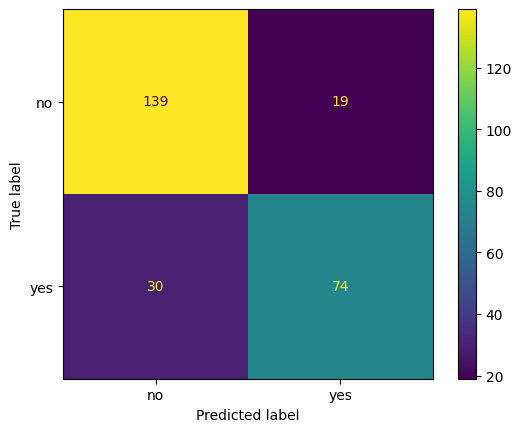

In [29]:
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(test_y, model.predict(test_x),
                                                        display_labels=['no','yes'])

Дерево решений смотрит на каждом этапе на какой-то самый значимый атрибут, и затем рассматривает два под-случая. Можем визуализировать дерево, чтобы стало понятнее:

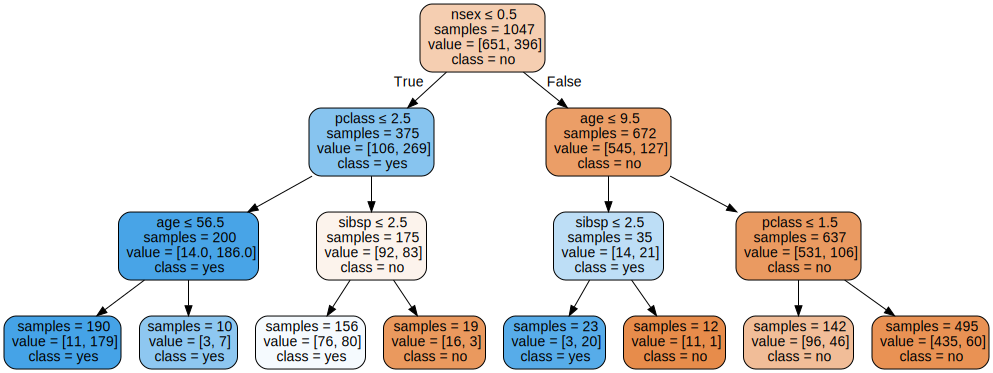

In [27]:
import graphviz
graphviz.Source(
  sklearn.tree.export_graphviz(model,
     feature_names = ['pclass','nsex','age','parch','sibsp'],
     class_names = ['no','yes'],
     filled=True, rounded=True, special_characters=True,impurity=False)
)


Посмотрим, какие атрибуты наиболее важны для принятия решения:

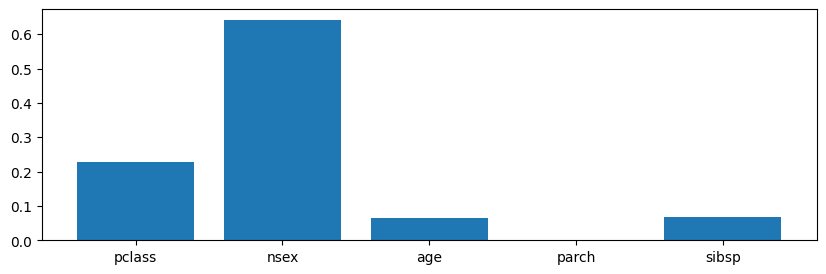

In [34]:
plt.figure(figsize=(10,3))
plt.bar(['pclass','nsex','age','parch','sibsp'],model.feature_importances_)
plt.show()

На практике стоит пробовать несколько различных моделей машинного обучения и смотреть, какая даёт наибольшую точность.